In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx #conda install networkx to do
import igraph as ig #à installer
import leidenalg as la #à installer

In [3]:
df = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198067,Netoholic,Yelyos,-1,-1,2004,NaT,NaN
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...


Louvain or Leiden algo (improvement of Louvain) = https://www.nature.com/articles/s41598-019-41695-z
 
--> "Louvain algorithm has a major problem, for both modularity and CPM. The algorithm may yield arbitrarily badly connected communities, over and above the well-known issue of the resolution limit14. Communities may even be internally disconnected."

--> Implémentation: https://readthedocs.org/projects/leidenalg/downloads/pdf/latest/

## Louvain algo

2009 votes

In [4]:
df_2009=df[df['Year']==2009]

df_2009_pos=df_2009[df_2009['Vote']==1] 
df_2009_pos_=df_2009_pos[['Source', 'Target']]

G_2009_pos=nx.from_pandas_edgelist(df_2009_pos_, source='Source', target='Target')
G_2009_pos_community=nx.community.louvain_communities(G_2009_pos, seed=1234)
print('The number of community obtained for 2009 and positive vote is: ', len(G_2009_pos_community))

The number of community obtained for 2009 and positive vote is:  10


In [5]:
community_len_pos_2009=np.zeros(len(G_2009_pos_community), dtype=int)
for n, com in enumerate(G_2009_pos_community):
    community_len_pos_2009[n]=len(com)
print("The length of each community from positive and 2009 votes is")
community_len_pos_2009

The length of each community from positive and 2009 votes is


array([125, 389, 407, 134, 375, 422,  67,   2,   1,   2])

In [6]:
df_2009_neg=df_2009[df_2009['Vote']==-1] 
df_2009_neg_=df_2009_neg[['Source', 'Target']]
G_2009_neg=nx.from_pandas_edgelist(df_2009_neg_, source='Source', target='Target')
G_2009_neg_community=nx.community.louvain_communities(G_2009_neg, seed=1234)
print('The number of community obtained for 2009 and negative vote is: ', len(G_2009_neg_community))

The number of community obtained for 2009 and negative vote is:  9


In [7]:
community_len_neg_2009=np.zeros(len(G_2009_neg_community), dtype=int)
for n, com in enumerate(G_2009_neg_community):
    community_len_neg_2009[n]=len(com)
print("The length of each community from negative and 2009 votes is")
community_len_neg_2009

The length of each community from negative and 2009 votes is


array([178,  59,  92,  20,  43, 251, 178, 210, 195])

2006 votes

In [8]:
df_2006=df[df['Year']==2006]

df_2006_pos=df_2006[df_2006['Vote']==1] 
df_2006_pos_=df_2006_pos[['Source', 'Target']]

G_2006_pos=nx.from_pandas_edgelist(df_2006_pos_, source='Source', target='Target')
G_2006_pos_community=nx.community.louvain_communities(G_2006_pos, seed=1234)
print('The number of community obtained for 2006 and positive vote is: ', len(G_2006_pos_community))

The number of community obtained for 2006 and positive vote is:  22


In [9]:
community_len_pos_2006=np.zeros(len(G_2006_pos_community), dtype=int)
for n, com in enumerate(G_2006_pos_community):
    community_len_pos_2006[n]=len(com)
print("The length of each community from positive and 2006 votes is")
community_len_pos_2006

The length of each community from positive and 2006 votes is


array([211, 980, 937, 834,   5,   7,   4,   2,   1,   4,   6,   2,   2,
         3,  10,   3,   2,   2,   2,   1,  50,   6])

In [10]:
df_2006=df[df['Year']==2006]

df_2006_neg=df_2006[df_2006['Vote']==-1] 
df_2006_neg_=df_2006_neg[['Source', 'Target']]

G_2006_neg=nx.from_pandas_edgelist(df_2006_neg_, source='Source', target='Target')
G_2006_neg_community=nx.community.louvain_communities(G_2006_neg, seed=1234)
print('The number of community obtained for 2006 and negative vote is: ', len(G_2006_neg_community))

The number of community obtained for 2006 and negative vote is:  12


In [11]:
community_len_neg_2006=np.zeros(len(G_2006_neg_community), dtype=int)
for n, com in enumerate(G_2006_neg_community):
    community_len_neg_2006[n]=len(com)
print("The length of each community from negative and 2006 votes is")
community_len_neg_2006

The length of each community from negative and 2006 votes is


array([266, 129,  59, 194,  21, 410,   2,   3, 485,   2,  28, 330])

For all years

In [109]:
def compute_com_size(community_list):
    community_size=np.zeros(len(community_list), dtype=int)
    for n, com in enumerate(community_list):
        community_size[n]=len(com)
    return(community_size)

In [105]:
def extract_community(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    #extract communities with Louvain algorithm 
    G_community=nx.community.louvain_communities(G, seed=1234)
    
    return G_community

In [111]:
#create the dataframe
columns = ['Year', 'Vote', 'Total nbr of community', 'Size of each community', 'Community members']
df_community=pd.DataFrame(columns=columns)

years=df['Year'].unique()
for n, year in enumerate(years):
    G_community_pos=extract_community(df, year,1)
    size_communities_pos=compute_com_size(G_community_pos)
    df_community.loc[3*n]=[year, 1, len(size_communities_pos), size_communities_pos, G_community_pos]

    G_community_neg=extract_community(df, year,-1)
    size_communities_neg=compute_com_size(G_community_neg)
    df_community.loc[3*n+1]=[year, -1, len(size_communities_neg), size_communities_neg, G_community_neg]

    G_community_neu=extract_community(df, year,0)
    size_communities_neu=compute_com_size(G_community_neu)
    df_community.loc[3*n+2]=[year, 0, len(size_communities_neu), size_communities_neu, G_community_neu]

df_community


,Year,Vote,Total nbr of community,Size of each community,Community members
0,2013,1,9,"[57, 35, 131, 67, 153, 96, 62, 3, 105]","[{Retrolord, LlamaAl, Trevj, Airplaneman, Mori..."
1,2013,-1,11,"[35, 29, 20, 23, 50, 35, 31, 17, 26, 33, 50]","[{Ocaasi, Mark91, Keepscases, OrenBochman, Dar..."
2,2013,0,11,"[15, 13, 27, 16, 15, 14, 7, 3, 28, 2, 15]","[{nan, Pol430, Ypnypn, Brambleberry of RiverCl..."
3,2012,1,9,"[155, 80, 141, 202, 86, 116, 73, 2, 93]","[{nan, Russavia, Ferddog, Keepscases, Tom Morr..."
4,2012,-1,13,"[25, 29, 34, 84, 71, 49, 36, 30, 27, 41, 71, 4...","[{Dusti, Headbomb, Hasteur, Modernist, Ktr101,..."
5,2012,0,19,"[18, 14, 2, 2, 3, 21, 17, 10, 20, 17, 33, 2, 1...","[{Intothatdarkness, Gigs, My76Strat, Edison, K..."
6,2011,1,11,"[125, 68, 62, 301, 114, 189, 107, 127, 79, 2, 1]","[{Pi, Rklawton, N5iln, Magog the Ogre, Mojowor..."
7,2011,-1,13,"[2, 51, 51, 39, 74, 40, 2, 48, 50, 47, 67, 92,...","[{It Is Me Here, Anomie}, {Intothatdarkness, M..."
8,2011,0,21,"[22, 4, 12, 9, 34, 18, 9, 3, 25, 33, 22, 2, 2,...","[{nan, Ke5crz, Carrite, Breawycker, Eluchil404..."
9,2010,1,8,"[210, 261, 52, 381, 128, 406, 22, 2]","[{MurfleMan, MC10, Keepscases, Wandering Couri..."


Text(0, 0.5, 'Number of community')

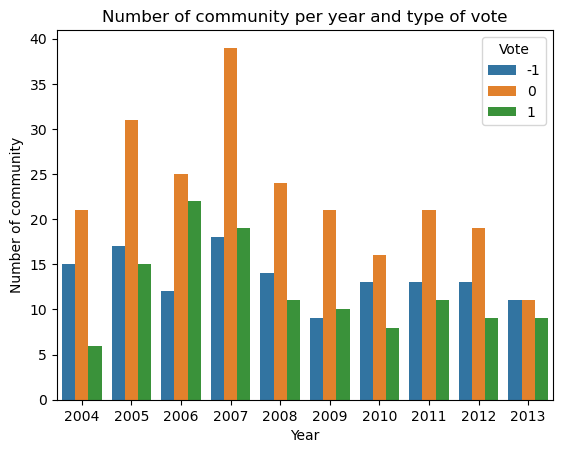

In [113]:
sns.barplot(data=df_community[['Year', 'Vote', 'Total nbr of community']], x='Year', y='Total nbr of community', hue='Vote')

plt.title('Number of community per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Number of community')

## Leiden algorithm

In [16]:
#convert from networkx to ig
H_2006_pos= ig.Graph.from_networkx(G_2006_pos)
partition = la.find_partition(H_2006_pos, la.ModularityVertexPartition)
type(partition)

leidenalg.VertexPartition.ModularityVertexPartition

In [37]:
def extract_community_leiden(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    #convert into ig
    H=ig.Graph.from_networkx(G)

    #extract communities with Leiden algorithm 
    partition = la.find_partition(H, la.ModularityVertexPartition)
    
    return partition

In [38]:
def compute_partition_features(partition):
    #gives the number of community we have
    nbr_community=np.max(partition.membership)
    ind_community_size=[]
    for i in range (nbr_community):
        #gives the size of community i+1
        nbr=sum(partition.membership==np.full_like(partition.membership, fill_value=i+1)) 
        ind_community_size.append(nbr)
    return nbr_community, ind_community_size


In [64]:
#create the dataframe
columns_ = ['Year', 'Vote', 'Total nbr of community', 'Size of each community']
df_community_leiden=pd.DataFrame(columns=columns_)

years=df['Year'].unique()
for n, year in enumerate(years):
    partition_pos=extract_community_leiden(df, year,1)
    features_pos=compute_partition_features(partition_pos)
    #print(features_pos)
    df_community_leiden.loc[3*n]=[year, 1, features_pos[0], features_pos[1]]

    partition_neg=extract_community_leiden(df, year,-1)
    features_neg=compute_partition_features(partition_neg)
    #print(len(features_neg[1]))
    df_community_leiden.loc[3*n+1]=[year, -1, features_neg[0], features_neg[1]]

    partition_neu=extract_community_leiden(df, year,0)
    features_neu=compute_partition_features(partition_neu)
    df_community_leiden.loc[3*n+2]=[year, 0, features_neu[0], features_neu[1]]

df_community_leiden

,Year,Vote,Total nbr of community,Size of each community
0,2013,1,9,"[109, 92, 84, 72, 68, 67, 61, 36, 3]"
1,2013,-1,10,"[43, 40, 34, 33, 31, 28, 24, 22, 20, 20]"
2,2013,0,10,"[25, 20, 15, 15, 14, 11, 11, 10, 3, 2]"
3,2012,1,8,"[184, 156, 110, 108, 72, 57, 49, 2]"
4,2012,-1,10,"[85, 62, 56, 51, 49, 46, 42, 35, 32, 23]"
5,2012,0,17,"[22, 22, 22, 22, 21, 19, 19, 17, 15, 15, 14, 1..."
6,2011,1,9,"[166, 148, 133, 127, 126, 113, 103, 2, 1]"
7,2011,-1,12,"[76, 69, 57, 54, 54, 49, 45, 45, 37, 25, 2, 2]"
8,2011,0,20,"[25, 24, 23, 22, 21, 21, 21, 20, 17, 17, 17, 1..."
9,2010,1,5,"[353, 324, 284, 112, 2]"


Text(0, 0.5, 'Number of community')

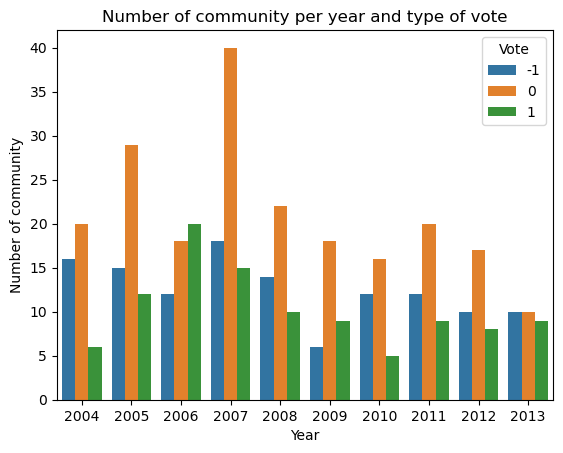

In [65]:
sns.barplot(data=df_community_leiden[['Year', 'Vote', 'Total nbr of community']], x='Year', y='Total nbr of community', hue='Vote')

plt.title('Number of community per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Number of community')